In [1]:
# load the standard libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# laod the data

df=pd.read_csv(r"C:\Users\Lenovo\Downloads\Train_Data (1).csv")
df

,text,author,controversiality,parent_text,parent_score,parent_votes,parent_author,parent_controversiality,Score
0,i must be retarded i thought it meant con lawl...,['calantus'],0,"It's quite unfair to call Hillary Clinton a ""c...",245,245,Whisper,0,-8
1,DOWNMODDED FOR IRRELEVANCE? ISN'T THAT HOW THI...,['Shadowrose'],0,upmodded for awesome kindness,32,32,b3mus3d,0,-16
2,"THAT WAS SUPPOSED TO MEAN "" BY A PLACE WHERE P...",['NExusRush'],0,"What the hell does ""because its by a golf cour...",12,12,mr_jellyneck,0,-7
3,I THOUGHT EVERYONE DID; ITS FUCKING DELICIOUS :\,['R0N_SWANS0N'],0,NICE TRY JENNIFER! I KNOW IT'S YOU AND I KNOW...,117,117,ometzo,0,67
4,"Great work, Zhesbe! I'd give you a raise but y...",['reddums'],0,"""HEY BOSS COME LOOK AT WHAT I DID!""",1933,1933,Zhesbe,0,1348
...,...,...,...,...,...,...,...,...,...
4994,"Dying words of my father: ""Son, one day a man ...",['Karmamechanic'],0,"Gather round, drinking buddies. It's that tim...",540,540,willis77,0,234
4995,CATERING TO EVERYONE AND THEIR IMPOSSIBLE SIMU...,['Schym'],0,So basically Sona players will get the authent...,560,560,sleeplessone,0,107
4996,RABBLERABBLERABBLERABBLE!,['Azurphax'],0,"**everyone, its Forthewolfx!**",370,370,KinkyTraficCone,0,193
4997,"LITTLE KNOWN FACT, ""VIOLA"" IS NOT ONLY A FRENC...",['DcGutz'],0,"Ending the comment train with ""Voila.""",4,4,Anderson0457,0,-8


####  target column analysis

In [5]:
df.parent_controversiality.unique()

array([0, 1], dtype=int64)

In [29]:
df.parent_controversiality.value_counts()

0    4993
1       6
Name: parent_controversiality, dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='parent_controversiality', ylabel='count'>

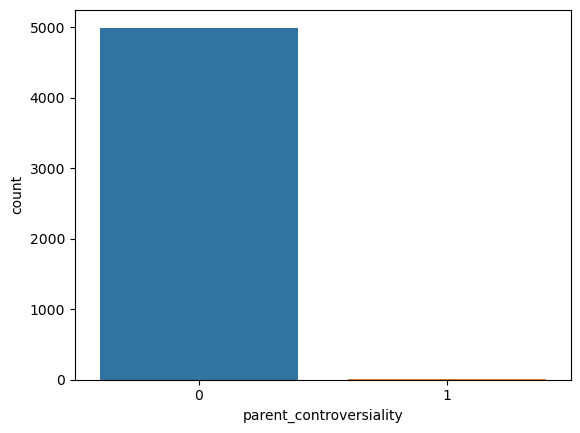

In [6]:
sb.countplot(df.parent_controversiality)

####  preprocesing on text columns

In [ ]:
# 1) convert text column into the lower

In [12]:
df["text"]=df.text.str.lower()
df

,text,author,controversiality,parent_text,parent_score,parent_votes,parent_author,parent_controversiality,Score
0,i must be retarded i thought it meant con lawl...,['calantus'],0,"It's quite unfair to call Hillary Clinton a ""c...",245,245,Whisper,0,-8
1,downmodded for irrelevance? isn't that how thi...,['Shadowrose'],0,upmodded for awesome kindness,32,32,b3mus3d,0,-16
2,"that was supposed to mean "" by a place where p...",['NExusRush'],0,"What the hell does ""because its by a golf cour...",12,12,mr_jellyneck,0,-7
3,i thought everyone did; its fucking delicious :\,['R0N_SWANS0N'],0,NICE TRY JENNIFER! I KNOW IT'S YOU AND I KNOW...,117,117,ometzo,0,67
4,"great work, zhesbe! i'd give you a raise but y...",['reddums'],0,"""HEY BOSS COME LOOK AT WHAT I DID!""",1933,1933,Zhesbe,0,1348
...,...,...,...,...,...,...,...,...,...
4994,"dying words of my father: ""son, one day a man ...",['Karmamechanic'],0,"Gather round, drinking buddies. It's that tim...",540,540,willis77,0,234
4995,catering to everyone and their impossible simu...,['Schym'],0,So basically Sona players will get the authent...,560,560,sleeplessone,0,107
4996,rabblerabblerabblerabble!,['Azurphax'],0,"**everyone, its Forthewolfx!**",370,370,KinkyTraficCone,0,193
4997,"little known fact, ""viola"" is not only a frenc...",['DcGutz'],0,"Ending the comment train with ""Voila.""",4,4,Anderson0457,0,-8


In [ ]:
# 2)remvoing stop words

In [13]:
# find out the stop words

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords=stopwords.words("english")
stopwords  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# compare the stop words and with the text columns and removei t

In [14]:
# define a function to remove stop words

def remove_stopwords(text):
    return " ".join([i for i in text.split() if i not in stopwords])

In [15]:
# apply th function on the text columns

df["text"]=df["text"].apply(lambda x:remove_stopwords(x))
df

,text,author,controversiality,parent_text,parent_score,parent_votes,parent_author,parent_controversiality,Score
0,must retarded thought meant con lawl oh well w...,['calantus'],0,"It's quite unfair to call Hillary Clinton a ""c...",245,245,Whisper,0,-8
1,downmodded irrelevance? works?,['Shadowrose'],0,upmodded for awesome kindness,32,32,b3mus3d,0,-16
2,"supposed mean "" place people undoubtedly"" snak...",['NExusRush'],0,"What the hell does ""because its by a golf cour...",12,12,mr_jellyneck,0,-7
3,thought everyone did; fucking delicious :\,['R0N_SWANS0N'],0,NICE TRY JENNIFER! I KNOW IT'S YOU AND I KNOW...,117,117,ometzo,0,67
4,"great work, zhesbe! i'd give raise seem handle...",['reddums'],0,"""HEY BOSS COME LOOK AT WHAT I DID!""",1933,1933,Zhesbe,0,1348
...,...,...,...,...,...,...,...,...,...
4994,"dying words father: ""son, one day man approach...",['Karmamechanic'],0,"Gather round, drinking buddies. It's that tim...",540,540,willis77,0,234
4995,catering everyone impossible simultaneous need...,['Schym'],0,So basically Sona players will get the authent...,560,560,sleeplessone,0,107
4996,rabblerabblerabblerabble!,['Azurphax'],0,"**everyone, its Forthewolfx!**",370,370,KinkyTraficCone,0,193
4997,"little known fact, ""viola"" french word, string...",['DcGutz'],0,"Ending the comment train with ""Voila.""",4,4,Anderson0457,0,-8


In [ ]:
# 3) remvoing digits from the text

In [16]:
# import re module and define function to remove digits

import re
def remove_nums(text):
    return re.sub("[0-9]+","",text)

In [17]:
# apply thr function on text columns

df["text"]=df["text"].apply(lambda x : remove_nums(x))
df

,text,author,controversiality,parent_text,parent_score,parent_votes,parent_author,parent_controversiality,Score
0,must retarded thought meant con lawl oh well w...,['calantus'],0,"It's quite unfair to call Hillary Clinton a ""c...",245,245,Whisper,0,-8
1,downmodded irrelevance? works?,['Shadowrose'],0,upmodded for awesome kindness,32,32,b3mus3d,0,-16
2,"supposed mean "" place people undoubtedly"" snak...",['NExusRush'],0,"What the hell does ""because its by a golf cour...",12,12,mr_jellyneck,0,-7
3,thought everyone did; fucking delicious :\,['R0N_SWANS0N'],0,NICE TRY JENNIFER! I KNOW IT'S YOU AND I KNOW...,117,117,ometzo,0,67
4,"great work, zhesbe! i'd give raise seem handle...",['reddums'],0,"""HEY BOSS COME LOOK AT WHAT I DID!""",1933,1933,Zhesbe,0,1348
...,...,...,...,...,...,...,...,...,...
4994,"dying words father: ""son, one day man approach...",['Karmamechanic'],0,"Gather round, drinking buddies. It's that tim...",540,540,willis77,0,234
4995,catering everyone impossible simultaneous need...,['Schym'],0,So basically Sona players will get the authent...,560,560,sleeplessone,0,107
4996,rabblerabblerabblerabble!,['Azurphax'],0,"**everyone, its Forthewolfx!**",370,370,KinkyTraficCone,0,193
4997,"little known fact, ""viola"" french word, string...",['DcGutz'],0,"Ending the comment train with ""Voila.""",4,4,Anderson0457,0,-8


In [ ]:
# 4) remove urls

In [18]:
# import re module and define functions

import re
def remove_url(text):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',"",text)

In [19]:
# apply the function on the text column

df["text"]=df["text"].apply(lambda x:remove_url(x))
df

,text,author,controversiality,parent_text,parent_score,parent_votes,parent_author,parent_controversiality,Score
0,must retarded thought meant con lawl oh well w...,['calantus'],0,"It's quite unfair to call Hillary Clinton a ""c...",245,245,Whisper,0,-8
1,downmodded irrelevance? works?,['Shadowrose'],0,upmodded for awesome kindness,32,32,b3mus3d,0,-16
2,"supposed mean "" place people undoubtedly"" snak...",['NExusRush'],0,"What the hell does ""because its by a golf cour...",12,12,mr_jellyneck,0,-7
3,thought everyone did; fucking delicious :\,['R0N_SWANS0N'],0,NICE TRY JENNIFER! I KNOW IT'S YOU AND I KNOW...,117,117,ometzo,0,67
4,"great work, zhesbe! i'd give raise seem handle...",['reddums'],0,"""HEY BOSS COME LOOK AT WHAT I DID!""",1933,1933,Zhesbe,0,1348
...,...,...,...,...,...,...,...,...,...
4994,"dying words father: ""son, one day man approach...",['Karmamechanic'],0,"Gather round, drinking buddies. It's that tim...",540,540,willis77,0,234
4995,catering everyone impossible simultaneous need...,['Schym'],0,So basically Sona players will get the authent...,560,560,sleeplessone,0,107
4996,rabblerabblerabblerabble!,['Azurphax'],0,"**everyone, its Forthewolfx!**",370,370,KinkyTraficCone,0,193
4997,"little known fact, ""viola"" french word, string...",['DcGutz'],0,"Ending the comment train with ""Voila.""",4,4,Anderson0457,0,-8


In [ ]:
# 5) remove and clean repating word

In [20]:
# import re and define function

import re
def cleaning_dup(text):
    return re.sub(r'(.)1+',r'1',text)

In [21]:
df["text"]=df["text"].apply(lambda x:cleaning_dup(x))
df

,text,author,controversiality,parent_text,parent_score,parent_votes,parent_author,parent_controversiality,Score
0,must retarded thought meant con lawl oh well w...,['calantus'],0,"It's quite unfair to call Hillary Clinton a ""c...",245,245,Whisper,0,-8
1,downmodded irrelevance? works?,['Shadowrose'],0,upmodded for awesome kindness,32,32,b3mus3d,0,-16
2,"supposed mean "" place people undoubtedly"" snak...",['NExusRush'],0,"What the hell does ""because its by a golf cour...",12,12,mr_jellyneck,0,-7
3,thought everyone did; fucking delicious :\,['R0N_SWANS0N'],0,NICE TRY JENNIFER! I KNOW IT'S YOU AND I KNOW...,117,117,ometzo,0,67
4,"great work, zhesbe! i'd give raise seem handle...",['reddums'],0,"""HEY BOSS COME LOOK AT WHAT I DID!""",1933,1933,Zhesbe,0,1348
...,...,...,...,...,...,...,...,...,...
4994,"dying words father: ""son, one day man approach...",['Karmamechanic'],0,"Gather round, drinking buddies. It's that tim...",540,540,willis77,0,234
4995,catering everyone impossible simultaneous need...,['Schym'],0,So basically Sona players will get the authent...,560,560,sleeplessone,0,107
4996,rabblerabblerabblerabble!,['Azurphax'],0,"**everyone, its Forthewolfx!**",370,370,KinkyTraficCone,0,193
4997,"little known fact, ""viola"" french word, string...",['DcGutz'],0,"Ending the comment train with ""Voila.""",4,4,Anderson0457,0,-8


In [ ]:
# 6) removing punctuations

In [22]:
# import punctuations from string module

import string
punct=string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# create function using punctuations and apply it on text columns

In [23]:
def remove_punc(text):
    translator=str.maketrans('','',punct)
    return text.translate(translator)

In [24]:
df["text"]=df["text"].apply(lambda x:remove_punc(x))
df

,text,author,controversiality,parent_text,parent_score,parent_votes,parent_author,parent_controversiality,Score
0,must retarded thought meant con lawl oh well work,['calantus'],0,"It's quite unfair to call Hillary Clinton a ""c...",245,245,Whisper,0,-8
1,downmodded irrelevance works,['Shadowrose'],0,upmodded for awesome kindness,32,32,b3mus3d,0,-16
2,supposed mean place people undoubtedly snake ...,['NExusRush'],0,"What the hell does ""because its by a golf cour...",12,12,mr_jellyneck,0,-7
3,thought everyone did fucking delicious,['R0N_SWANS0N'],0,NICE TRY JENNIFER! I KNOW IT'S YOU AND I KNOW...,117,117,ometzo,0,67
4,great work zhesbe id give raise seem handled y...,['reddums'],0,"""HEY BOSS COME LOOK AT WHAT I DID!""",1933,1933,Zhesbe,0,1348
...,...,...,...,...,...,...,...,...,...
4994,dying words father son one day man approach se...,['Karmamechanic'],0,"Gather round, drinking buddies. It's that tim...",540,540,willis77,0,234
4995,catering everyone impossible simultaneous need...,['Schym'],0,So basically Sona players will get the authent...,560,560,sleeplessone,0,107
4996,rabblerabblerabblerabble,['Azurphax'],0,"**everyone, its Forthewolfx!**",370,370,KinkyTraficCone,0,193
4997,little known fact viola french word stringed i...,['DcGutz'],0,"Ending the comment train with ""Voila.""",4,4,Anderson0457,0,-8


In [ ]:
#7) lemmatization

In [25]:
from nltk.stem import WordNetLemmatizer
wl=WordNetLemmatizer()
wl

<WordNetLemmatizer>

In [26]:
def lemmatizer_on_text(df):
    text=[wl.lemmatize(word) for word in df]
    return df

In [27]:
import nltk
nltk.download("wordnet")
nltk.download('omw-1.4')

df["text"]=df["text"].apply(lambda x:lemmatizer_on_text(x))
df

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,text,author,controversiality,parent_text,parent_score,parent_votes,parent_author,parent_controversiality,Score
0,must retarded thought meant con lawl oh well work,['calantus'],0,"It's quite unfair to call Hillary Clinton a ""c...",245,245,Whisper,0,-8
1,downmodded irrelevance works,['Shadowrose'],0,upmodded for awesome kindness,32,32,b3mus3d,0,-16
2,supposed mean place people undoubtedly snake ...,['NExusRush'],0,"What the hell does ""because its by a golf cour...",12,12,mr_jellyneck,0,-7
3,thought everyone did fucking delicious,['R0N_SWANS0N'],0,NICE TRY JENNIFER! I KNOW IT'S YOU AND I KNOW...,117,117,ometzo,0,67
4,great work zhesbe id give raise seem handled y...,['reddums'],0,"""HEY BOSS COME LOOK AT WHAT I DID!""",1933,1933,Zhesbe,0,1348
...,...,...,...,...,...,...,...,...,...
4994,dying words father son one day man approach se...,['Karmamechanic'],0,"Gather round, drinking buddies. It's that tim...",540,540,willis77,0,234
4995,catering everyone impossible simultaneous need...,['Schym'],0,So basically Sona players will get the authent...,560,560,sleeplessone,0,107
4996,rabblerabblerabblerabble,['Azurphax'],0,"**everyone, its Forthewolfx!**",370,370,KinkyTraficCone,0,193
4997,little known fact viola french word stringed i...,['DcGutz'],0,"Ending the comment train with ""Voila.""",4,4,Anderson0457,0,-8


####  feature encoding using countvectorizer

In [30]:
x=df.drop(["parent_controversiality"],axis=1)
y=df["parent_controversiality"]

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
cv

CountVectorizer()

In [33]:
cv.fit(x_train["text"])

CountVectorizer()

In [34]:
x_train=cv.transform(x_train["text"])
x_test=cv.transform(x_test["text"])

In [35]:
x_train

<3499x12138 sparse matrix of type '<class 'numpy.int64'>'
	with 48535 stored elements in Compressed Sparse Row format>

In [36]:
x_test

<1500x12138 sparse matrix of type '<class 'numpy.int64'>'
	with 18276 stored elements in Compressed Sparse Row format>

### apply logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr

LogisticRegression()

In [38]:
lr.fit(x_train,y_train)

LogisticRegression()

In [39]:
pred=lr.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)